# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [2]:
student_name = 'Max Chew'

In [3]:
student_id = '1355 2169'

In [4]:
experiment_id = '0'

In [5]:
business_objective = 'The purpose of experiment 0 is to gain a preliminary understanding of the dataset, and the variables. This involves several sections and processes including, features selection, data cleaning, features engineering, and preparation for modelling. A baseline model will also be created in order to assess the performance of future experiments. '

<hr>

## B. Experiment Description


In [6]:
experiment_hypothesis = 'There is no hypothesis to test. This is used for data exploration and analysis and required data preparation for the upcoming experiments.'

In [7]:
experiment_expectations = 'The goal is to assess the baseline performance for this project and fix critical data quality issues impacting models.'

<hr>

## C. Data Understanding


In [8]:
data_understanding_executive_summary = 'The following section aims to understand the structure and patterns in the dataset namely, exploring the target variables and the variable of interest as well as some assessing some basic relationships between these variables. Understanding both the structure and any correlations between variables can help assist in future variables selection section as well as understand the format of the data and what if any transformations and standardisations need to be made. Furthermore, Section C will highlight the need to modify any data values which are not fit for analysis in the data cleaning section.  '

### C.0 Import Packages

In [9]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Altair for plotting
import altair as alt

# Seaborn for plotting 
import seaborn as sns

# Scipy for stats 
from scipy.stats import chi2_contingency
from scipy.stats import zscore


# import numpy for log transform
import numpy as np

# matplotlib for plotting
import matplotlib.pyplot as plt

<hr>

### C.1   Load Datasets

In [10]:
# Load data
# Do not change this code

df0 = pd.read_csv("subscription_data_0.csv")
df1 = pd.read_csv("subscription_data_1.csv")
df2 = pd.read_csv("subscription_data_2.csv")
df3 = pd.read_csv("subscription_data_3.csv")
df4 = pd.read_csv("subscription_data_4.csv")
df5 = pd.read_csv("subscription_data_5.csv")
df6 = pd.read_csv("subscription_data_6.csv")
df7 = pd.read_csv("subscription_data_7.csv")
df8 = pd.read_csv("subscription_data_8.csv")
df9 = pd.read_csv("subscription_data_9.csv")

<hr>

### C.2 Explore Datasets

In [11]:
# Create list of all dfs

dflist = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]

# extract colnames from first dataset

reference_colnames = set(df0.columns)
reference_colnames

{'AccountAge',
 'AverageViewingDuration',
 'BuildingNumber',
 'Churn',
 'City',
 'Cohort',
 'ContentDownloadsPerMonth',
 'ContentType',
 'CustomerID',
 'DeviceRegistered',
 'Ethnicity',
 'FirstName',
 'Gender',
 'GenrePreference',
 'LastName',
 'MonthlyCharges',
 'MultiDeviceAccess',
 'PaperlessBilling',
 'ParentalControl',
 'PaymentMethod',
 'Postcode',
 'State',
 'StreetName',
 'StreetType',
 'SubscriptionType',
 'SubtitlesEnabled',
 'SupportTicketsPerMonth',
 'TotalCharges',
 'UserRating',
 'ViewingHoursPerWeek',
 'WatchlistSize'}

In [12]:
# Check to see if all remaing datasets conatain the same columns

all(set(df.columns) == reference_colnames for df in dflist)

True

> Insights: 

All 10 datasets all contain the same columns, and as a result can be combined into a single data frame for the remainder of the analysis.  

In [13]:
# Make new variable across all datasets which indicates which original datafram it came from in a field called source

for original_df, df in enumerate(dflist):
    df['source'] = f'df{original_df}'

df0.head()

,FirstName,LastName,BuildingNumber,StreetName,StreetType,City,Postcode,State,Ethnicity,AccountAge,...,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,Cohort,source
0,Aurora,Bravo,88588,Wanda Mission,Underpass,Sandyhaven,46890.0,NY,hispanic,20,...,2.176498,4,Male,3,No,No,CB6SXPNVZA,0,1-2-46890.0,df0
1,Ana,María,69,Laura Gateway,Drive,DPO AA 59306,NaN,NaN,white,57,...,3.478632,8,Male,23,No,Yes,S7R2G87O09,0,1-3-nan,df0
2,Susan,Lambert,81311,Hunter Fort,Cove,South Sarahshire,12793.0,HI,white,73,...,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0,1-3-12793.0,df0
3,David,Martinez,115,Whitney Drive,Valley,Danielside,56037.0,WV,hispanic,32,...,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0,1-2-56037.0,df0
4,Miss,Lydia,674,Stuart Ford,Trace,Johnsonland,99324.0,RI,white,57,...,3.616170,4,Female,0,No,No,4LGYPK7VOL,0,0-3-99324.0,df0


In [14]:
# combine all 10 datasets into a single data frame called data 

data = pd.concat(dflist, axis=0, ignore_index=True)
data

,FirstName,LastName,BuildingNumber,StreetName,StreetType,City,Postcode,State,Ethnicity,AccountAge,...,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,Cohort,source
0,Aurora,Bravo,88588,Wanda Mission,Underpass,Sandyhaven,46890.0,NY,hispanic,20,...,2.176498,4,Male,3,No,No,CB6SXPNVZA,0,1-2-46890.0,df0
1,Ana,María,69,Laura Gateway,Drive,DPO AA 59306,NaN,NaN,white,57,...,3.478632,8,Male,23,No,Yes,S7R2G87O09,0,1-3-nan,df0
2,Susan,Lambert,81311,Hunter Fort,Cove,South Sarahshire,12793.0,HI,white,73,...,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0,1-3-12793.0,df0
3,David,Martinez,115,Whitney Drive,Valley,Danielside,56037.0,WV,hispanic,32,...,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0,1-2-56037.0,df0
4,Miss,Lydia,674,Stuart Ford,Trace,Johnsonland,99324.0,RI,white,57,...,3.616170,4,Female,0,No,No,4LGYPK7VOL,0,0-3-99324.0,df0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,Lic.,Ilse,14356,Contreras Landing,Highway,APO AA 79140,NaN,NaN,white,113,...,2.571882,5,Male,3,No,No,BSQ3ZN2AV1,0,1-3-nan,df9
34582,Dr,Joanna,605,Taylor River,Mews,South Kaitlynport,95400.0,AR,white,42,...,2.361023,6,Male,17,No,No,B8BLN9K629,1,1-3-95400.0,df9
34583,Giorgio,Bajardi-Battelli,179,James Extensions,Radial,APO AE 13486,NaN,NaN,white,43,...,3.695672,5,Male,6,No,No,B01577YHQO,0,1-3-nan,df9
34584,Miss,June,762,Kyle Landing,Shore,Lake Johnbury,36487.0,MA,NaN,110,...,4.892557,1,Male,5,No,No,H8OZZRCV21,0,1-4-36487.0,df9


> Insights: All datasets are successfully combined. The final concatenated dataset 'data' contains 34,586 observations across 32 fields, including the newly created field indicating the original dataset it came from. 

In [15]:
# print out table of all variables and all of their datatypes 

column_info = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data.dtypes
}).reset_index(drop=True)
column_info

,Column Name,Data Type
0,FirstName,object
1,LastName,object
2,BuildingNumber,int64
3,StreetName,object
4,StreetType,object
5,City,object
6,Postcode,float64
7,State,object
8,Ethnicity,object
9,AccountAge,int64


> Insights: The dataset contains a combination of float, int and categorical data. Categorical features if included in later analysis may need to be one-hot encoded

In [16]:
# find features which are missing values and their total amount

missing_values = data.isnull().sum()
missing_values

FirstName                       0
LastName                        3
BuildingNumber                  0
StreetName                      0
StreetType                      0
City                            0
Postcode                     3784
State                        3784
Ethnicity                   11050
AccountAge                      0
MonthlyCharges                  0
TotalCharges                    0
SubscriptionType                0
PaymentMethod                   0
PaperlessBilling                0
ContentType                     0
MultiDeviceAccess               0
DeviceRegistered                0
ViewingHoursPerWeek             0
AverageViewingDuration          0
ContentDownloadsPerMonth        0
GenrePreference                 0
UserRating                      0
SupportTicketsPerMonth          0
Gender                          0
WatchlistSize                   0
ParentalControl                 0
SubtitlesEnabled                0
CustomerID                      0
Churn         

<AxesSubplot: >

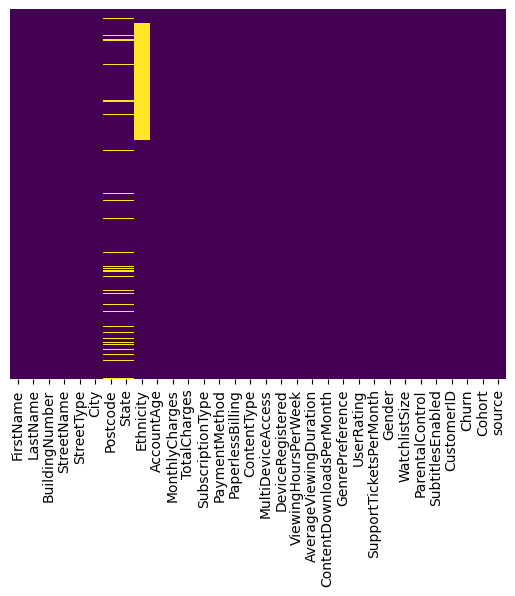

In [17]:
# visualise missing datapoints 

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

> Insights: the Last name, postcode, state and ethnicity column all contain missing values and are reported in the first cell.

In [18]:
# Find count of duplicate values 

data.duplicated().sum()

0

> Insights: There are no duplicate values in the dataset 

In [19]:
# get descriptive statistics and distributions for numerical values 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
BuildingNumber,34586.0,18382.107384,27820.825292,0.000000,670.000000,4495.000000,24926.750000,99999.000000
Postcode,30802.0,50439.623498,28715.400686,501.000000,25490.250000,50572.000000,75218.500000,99947.000000
AccountAge,34586.0,60.034205,34.356975,1.000000,30.000000,60.000000,90.000000,119.000000
MonthlyCharges,34586.0,12.481594,4.303706,4.990062,8.744131,12.472481,16.174570,19.989412
TotalCharges,34586.0,749.126439,523.014579,5.101684,330.732530,644.610183,1087.452915,2373.700290
ViewingHoursPerWeek,34586.0,20.575998,11.233775,1.000133,10.876132,20.666960,30.302291,39.998560
AverageViewingDuration,34586.0,92.427566,50.592829,5.002643,48.448066,92.674569,136.051872,179.999025
ContentDownloadsPerMonth,34586.0,24.615972,14.450537,0.000000,12.000000,25.000000,37.000000,49.000000
UserRating,34586.0,3.009000,1.154705,1.000007,2.007270,3.021349,4.007800,4.999845
SupportTicketsPerMonth,34586.0,4.498930,2.870450,0.000000,2.000000,4.000000,7.000000,9.000000


> Insights: individual numerical values will be further analysed in section C.4 

In [20]:
for value in data.select_dtypes(include=['object']).columns:
    print(data[value].value_counts(dropna=False))

FirstName
Dr.                 675
Dr                  607
Mx.                 426
Michael             406
Mr                  359
                   ... 
Cal                   1
Raymond-Maxime        1
Timothée-Richard      1
Giacomo               1
Jeanne-Océane         1
Name: count, Length: 2247, dtype: int64
LastName
Smith               224
Jones               150
Williams            147
Johnson             141
Brown               132
                   ... 
Cross-Smith           1
Hosae-Tyrrell         1
Smith-Jordan          1
Ludovisi-Santi        1
Ferrante-Foletti      1
Name: count, Length: 8661, dtype: int64
StreetName
Smith Ports        7
Michael Lodge      7
Jessica Isle       7
Smith Alley        7
Johnson Squares    7
                  ..
Bennett Brooks     1
Mitchell Spurs     1
Solomon Shore      1
Alec Parkways      1
Kyle Landing       1
Name: count, Length: 29006, dtype: int64
StreetType
Lodge        354
Prairie      337
Street       336
Road         334
Mountains  

> Insights: The values for cohort seem to contain very specific types. This could be shortened to just include the first two indicators (in the X-X format) to separate the customers in to more broad groups. Street, State and City also have high cardinality and it may be more appropriate to focus on the state category as a catchall for geographical location. Despite losing some detail, this should prevent overfitting and provide more interpretable coefficients.  

> Considerations: to preserve data privacy of customers identifying features should be removed from the dataset.

> Issues found: Some data cleaning is needed for some of the categorical variables to reduce high cardinality. High missing values in ethnicity (as well as ethical considerations) mean that it will not be included in the model. 

<hr>

### C.3 Explore Target variable

In [21]:
# Set the name of the target column
# 'Churn is the target variable
# '0' value means customer did not churn

target_name = 'Churn'

In [22]:
#  get proportion of positive to negative churn values 

data[target_name].value_counts(normalize=True)

Churn
0    0.822472
1    0.177528
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Count')

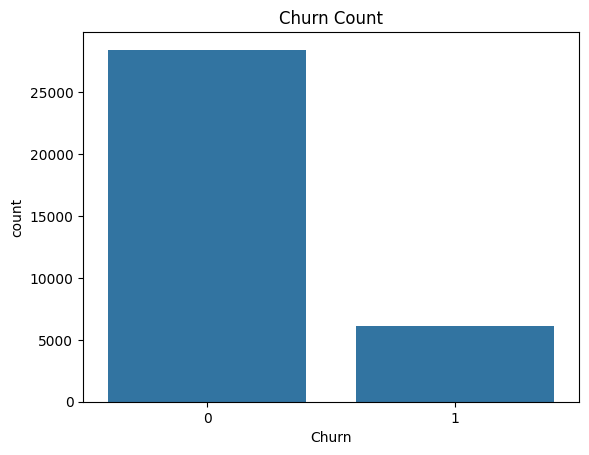

In [23]:
# create countplot 

sns.countplot(x=target_name, data=data, )
plt.title('Churn Count')

> Insights: There is class imbalance at where approx. 18% of customers in the data set "churned".

> Considerations: the skewness of the target variable suggests that accuracy may be a poor predictor of model performance. 

> Issues found:  No issues found with the target variable.

<hr>

### C.4 Explore Variables of Interest

The bulk of the analysis of features is performed in section C.5.  

<hr>

#### C.4.a Feature "ContentDownloadsPerMonth"

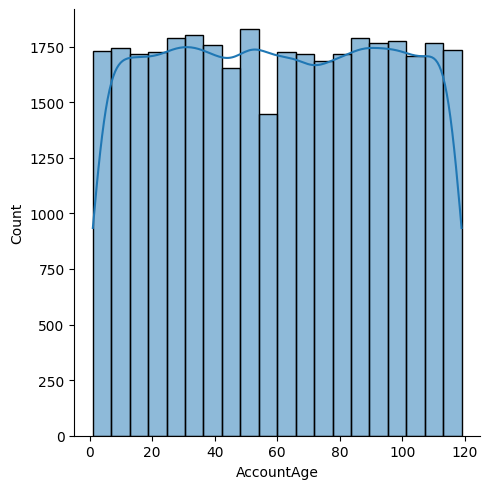

In [24]:
# Plot districution of feature "ContentDownloadsPerMonth"

sns.displot(data['AccountAge'], kde=True, bins=20)



> Insights: The distribution of account age seems to be mostly uniform

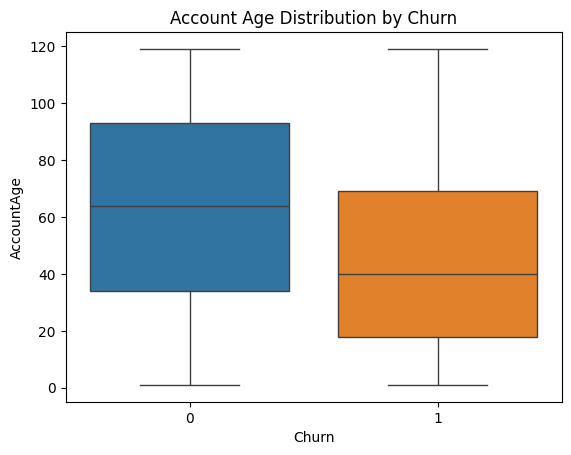

In [25]:
# Create Barplot for Account age split by Churn 

sns.boxplot(x='Churn', y='AccountAge',hue = 'Churn', data=data)
plt.title('Account Age Distribution by Churn')
plt.legend([], [], frameon=False)

> Insights: The distribution of account age seems to be skewed lower in customers that did churn. 

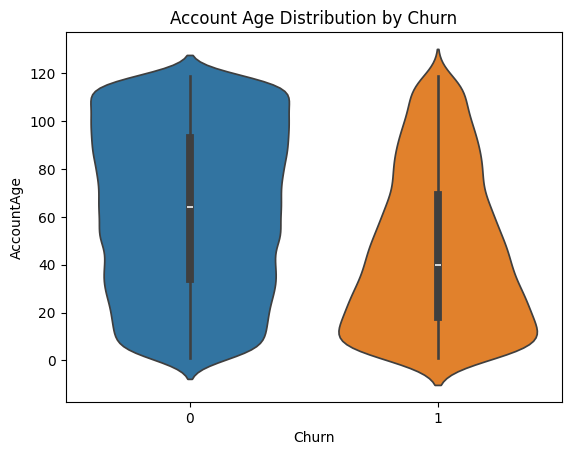

In [26]:
# plotted against target

sns.violinplot(x='Churn', y='AccountAge',hue = 'Churn', data=data)
plt.title('Account Age Distribution by Churn')
plt.legend([], [], frameon=False)

> Insights: The distribution of account age seems to be skewed lower in customers that did churn. 

> Considerations: AccountAge appears to be an appropriate variable to be analysed further for modelling 

> Issues found: No issues found in this variable 

#### C.4.b Feature "Gender"

<AxesSubplot: xlabel='Gender', ylabel='count'>

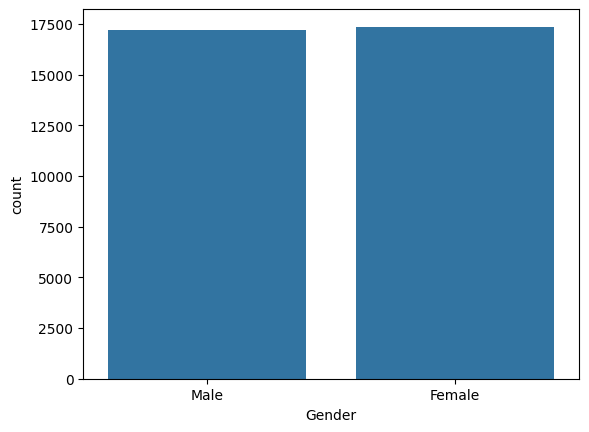

In [27]:
# count plot for gender

sns.countplot(x='Gender', data=data)

> Insights: the value counts for gender are even distributed

<AxesSubplot: xlabel='Gender', ylabel='count'>

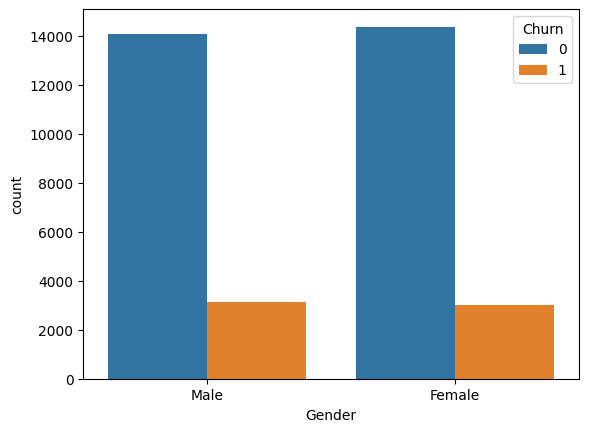

In [28]:
# create countplots seperated by target variable

sns.countplot(x='Gender', hue='Churn', data=data)


> Insights: the distribution per gender when separated by whether the customer churned or not appears to be relatively evenly distributed.

> Considerations: It does not appear from that this variable will provide insight into whether customers would churn or not.

> Issues found: No issues found with this variable 

<hr>

## D. Feature Selection


In [29]:
feature_selection_executive_summary = 'Section D focuses on selecting the features relevant for future modelling. The section will use different approaches to attempt to reduce the dataset variables to just those features which may be correlated with the target variable, or are necessary for feature engineering. '

### D.0 Drop Personal Identification columns

> Rationale: Removing personal identifiers to preserve the privacy of the customers. 

In [30]:
data_nonpersonal = data.drop(columns=['BuildingNumber', 'City', 'CustomerID', 'Ethnicity', 'FirstName', 'LastName', 'Postcode', 'StreetName', 'StreetType'], inplace=False)

data_nonpersonal

,State,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,...,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,Cohort,source
0,NY,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,...,Sci-Fi,2.176498,4,Male,3,No,No,0,1-2-46890.0,df0
1,NaN,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,...,Action,3.478632,8,Male,23,No,Yes,0,1-3-nan,df0
2,HI,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,...,Fantasy,4.238824,6,Male,1,Yes,Yes,0,1-3-12793.0,df0
3,WV,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,...,Drama,4.276013,2,Male,24,Yes,Yes,0,1-2-56037.0,df0
4,RI,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,...,Comedy,3.616170,4,Female,0,No,No,0,0-3-99324.0,df0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,NaN,113,8.852247,1000.303949,Basic,Credit card,No,TV Shows,Yes,Mobile,...,Fantasy,2.571882,5,Male,3,No,No,0,1-3-nan,df9
34582,AR,42,10.983620,461.312027,Standard,Mailed check,Yes,Movies,No,Mobile,...,Drama,2.361023,6,Male,17,No,No,1,1-3-95400.0,df9
34583,NaN,43,11.959520,514.259343,Premium,Credit card,No,TV Shows,No,Mobile,...,Action,3.695672,5,Male,6,No,No,0,1-3-nan,df9
34584,MA,110,5.222484,574.473204,Basic,Bank transfer,No,Both,Yes,Tablet,...,Fantasy,4.892557,1,Male,5,No,No,0,1-4-36487.0,df9


### D.1 Approach 1

> Rationale: Assessing corelation between the target variable and features can assist in highlight features which most relevant for inlcusion in modelling 

In [31]:
# get correlation table for numerical features 

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_table = data[numerical_features].corr()

correlation_table

,BuildingNumber,Postcode,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
BuildingNumber,1.000000,0.000705,0.003587,0.003993,0.003407,0.006161,0.006379,0.000083,-0.006600,-0.001709,-0.000198,-0.004615
Postcode,0.000705,1.000000,0.000879,-0.000986,-0.001022,0.004295,0.003940,-0.004946,0.000971,-0.002358,0.000949,0.002856
AccountAge,0.003587,0.000879,1.000000,-0.001326,0.821226,-0.002407,-0.002339,-0.004764,-0.002983,-0.012713,-0.004800,-0.192684
MonthlyCharges,0.003993,-0.000986,-0.001326,1.000000,0.494844,0.001766,-0.000544,-0.006180,-0.005412,-0.001716,-0.001133,0.099633
TotalCharges,0.003407,-0.001022,0.821226,0.494844,1.000000,-0.001796,0.000765,-0.008734,-0.006876,-0.012875,-0.005867,-0.114946
ViewingHoursPerWeek,0.006161,0.004295,-0.002407,0.001766,-0.001796,1.000000,-0.000428,0.001124,-0.007350,0.002152,0.000793,-0.137970
AverageViewingDuration,0.006379,0.003940,-0.002339,-0.000544,0.000765,-0.000428,1.000000,0.003672,-0.003295,0.002337,0.001449,-0.146405
ContentDownloadsPerMonth,0.000083,-0.004946,-0.004764,-0.006180,-0.008734,0.001124,0.003672,1.000000,0.010413,0.003431,0.002784,-0.125693
UserRating,-0.006600,0.000971,-0.002983,-0.005412,-0.006876,-0.007350,-0.003295,0.010413,1.000000,-0.004936,0.009951,0.013111
SupportTicketsPerMonth,-0.001709,-0.002358,-0.012713,-0.001716,-0.012875,0.002152,0.002337,0.003431,-0.004936,1.000000,-0.000596,0.085398


Text(0.5, 1.0, 'Correlation Heatmap for Numerical Features')

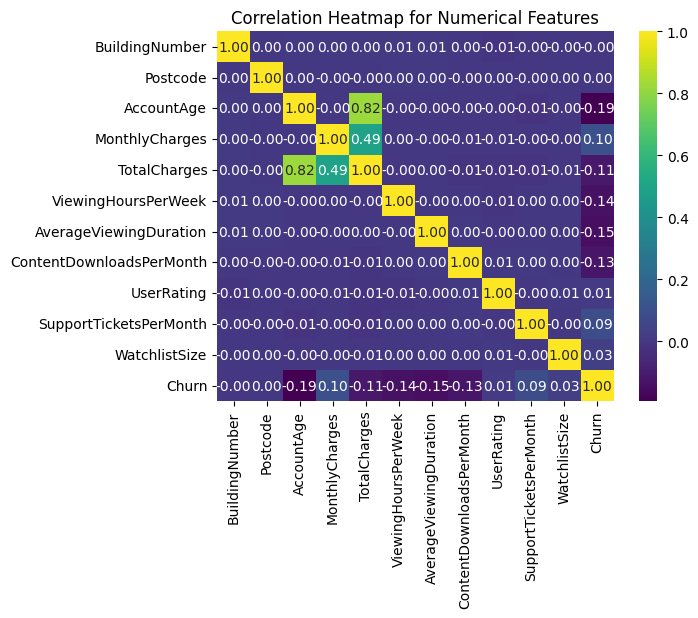

In [32]:
# produce correlation heatmap

sns.heatmap(correlation_table, annot=True, cmap='viridis', fmt='.2f')

plt.title('Correlation Heatmap for Numerical Features')

> Results: AccountsAge, Monthly Charges, TotalCharges, ViewingHoursPerWeek, AveragaeViewingDuration, ContentDownlaodsPerMonth and  SupportTicketsPerMonth were all selected for features to be included in the model based off of their Pearson's correlation with the target variable.

### D.2 Approach 2

> Rationale: a chi squared test was chosen to be used to assess independence between categorical features and churn. 

In [33]:
# simplify cohort variable to just the first three identifiers

data_nonpersonal['CohortSimplifed'] = data_nonpersonal['Cohort'].str[:3]

data_nonpersonal['CohortSimplifed'].value_counts()

CohortSimplifed
1-3    9277
0-3    9233
0-4    5624
1-4    5426
1-2    1728
0-2    1674
1-1     484
0-1     463
0-0     374
1-0     303
Name: count, dtype: int64

In [34]:
# create list of categorical features
categorical_features = data_nonpersonal.select_dtypes(include=['object']).columns

# create empty list to store chi-squared test results
chi2_results = []

# run chi-squared test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(data_nonpersonal[feature], data_nonpersonal[target_name])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((feature, chi2, p))

# create dataframe of chi-squared test results
results = pd.DataFrame(chi2_results)

# rename columns
results.columns = ['Feature', 'Chi-Squared', 'p-value']

#return resutls
results

,Feature,Chi-Squared,p-value
0,State,56.017471,5.493768e-01
1,SubscriptionType,61.988064,3.463082e-14
2,PaymentMethod,27.816849,3.968153e-06
3,PaperlessBilling,0.210172,6.466322e-01
4,ContentType,6.234483,4.427914e-02
5,MultiDeviceAccess,0.178728,6.724685e-01
6,DeviceRegistered,6.222106,1.012904e-01
7,GenrePreference,15.040045,4.618878e-03
8,Gender,6.248100,1.243266e-02
9,ParentalControl,0.183848,6.680873e-01


> Results: of this features set, SubscriptionType, PaymentMethod, ContentType, DevicesRegistered, GenrePreference,Gender and CohortSimplified were selcted to be included based off of the results from the chi-squared test. 

### D.3 Final Selection of Features

In [35]:
# final featureset to be included

features_list = ['AccountAge','MonthlyCharges', 'TotalCharges',
       'SubscriptionType', 'PaymentMethod', 'ContentType', 
       'DeviceRegistered', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference',
       'SupportTicketsPerMonth', 'Gender', 'Churn', 'source',
       'CohortSimplifed']

In [36]:
data_preprocessed = data_nonpersonal[features_list]
data_preprocessed

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,SupportTicketsPerMonth,Gender,Churn,source,CohortSimplifed
0,20,11.055215,221.104302,Premium,Mailed check,Both,Mobile,36.758104,63.531377,10,Sci-Fi,4,Male,0,df0,1-2
1,57,5.175208,294.986882,Basic,Credit card,Movies,Tablet,32.450568,25.725595,18,Action,8,Male,0,df0,1-3
2,73,12.106657,883.785952,Basic,Mailed check,Movies,Computer,7.395160,57.364061,23,Fantasy,6,Male,0,df0,1-3
3,32,7.263743,232.439774,Basic,Electronic check,TV Shows,Tablet,27.960389,131.537507,30,Drama,2,Male,0,df0,1-2
4,57,16.953078,966.325422,Premium,Electronic check,TV Shows,TV,20.083397,45.356653,20,Comedy,4,Female,0,df0,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,113,8.852247,1000.303949,Basic,Credit card,TV Shows,Mobile,36.286152,17.915012,34,Fantasy,5,Male,0,df9,1-3
34582,42,10.983620,461.312027,Standard,Mailed check,Movies,Mobile,17.487259,102.412522,9,Drama,6,Male,1,df9,1-3
34583,43,11.959520,514.259343,Premium,Credit card,TV Shows,Mobile,26.355127,48.160768,17,Action,5,Male,0,df9,1-3
34584,110,5.222484,574.473204,Basic,Bank transfer,Both,Tablet,20.805085,54.255558,8,Fantasy,1,Male,0,df9,1-4


<hr>

## E. Data Cleaning


In [37]:
data_cleaning_executive_summary = 'The goal of section E is to ensure that the dataset is prepared for analysis. This includes dealing with missing values, incorrect datatypes and outliers. Duplicates have already been checked in prior section. Missing values as well as categorical values which contain low or greatly imbalanced classes will also be checked and dealt with.  '

<hr>

### E.1 Fixing Missing Data Values

> Rationale: Check for and deal with missing data values

In [38]:
# chekc for missing data points

data_preprocessed.isna().sum()


AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
ContentType                 0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
SupportTicketsPerMonth      0
Gender                      0
Churn                       0
source                      0
CohortSimplifed             0
dtype: int64

In [39]:
# check for invalid, low value count object variables 

for value in data_preprocessed.select_dtypes(include=['object']).columns:
    print(data_preprocessed[value].value_counts(dropna=False))

SubscriptionType
Standard    11674
Basic       11572
Premium     11340
Name: count, dtype: int64
PaymentMethod
Mailed check        8711
Credit card         8707
Electronic check    8630
Bank transfer       8538
Name: count, dtype: int64
ContentType
Movies      11566
Both        11525
TV Shows    11495
Name: count, dtype: int64
DeviceRegistered
Mobile      8731
Computer    8662
Tablet      8623
TV          8570
Name: count, dtype: int64
GenrePreference
Comedy     7022
Fantasy    7019
Action     6892
Drama      6857
Sci-Fi     6796
Name: count, dtype: int64
Gender
Female    17368
Male      17218
Name: count, dtype: int64
source
df0    12190
df8     2850
df5     2816
df6     2800
df4     2794
df3     2793
df7     2785
df9     2784
df2     2769
df1        5
Name: count, dtype: int64
CohortSimplifed
1-3    9277
0-3    9233
0-4    5624
1-4    5426
1-2    1728
0-2    1674
1-1     484
0-1     463
0-0     374
1-0     303
Name: count, dtype: int64


> Results: No missing data values, no further steps required 

<hr>

### E.2 Fixing "outliers in numerical fearues"

> Rationale: Outliers in numerical features can impact model performance. inspecting boxplots and removing outliers which lie outise a +--3 z-score can improve model performance. 

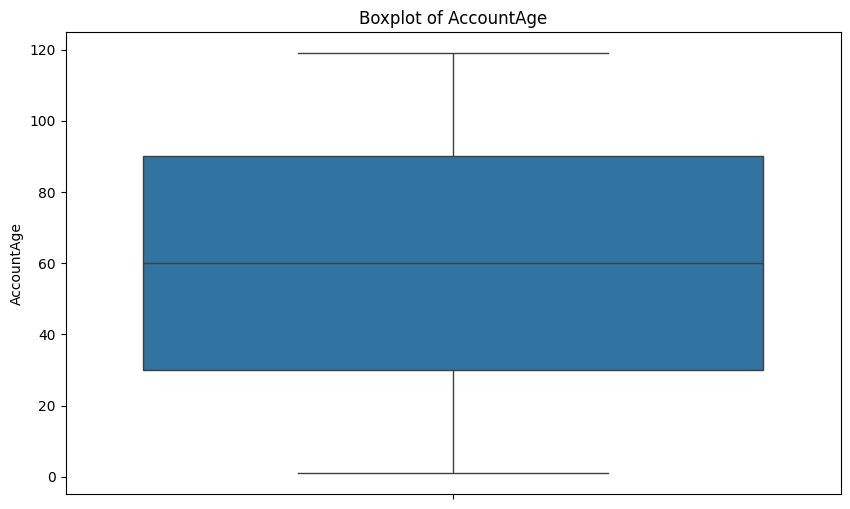

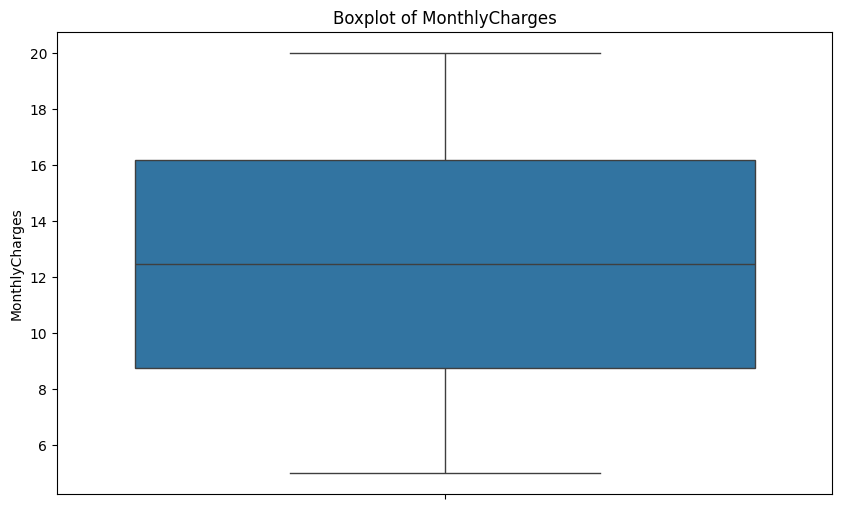

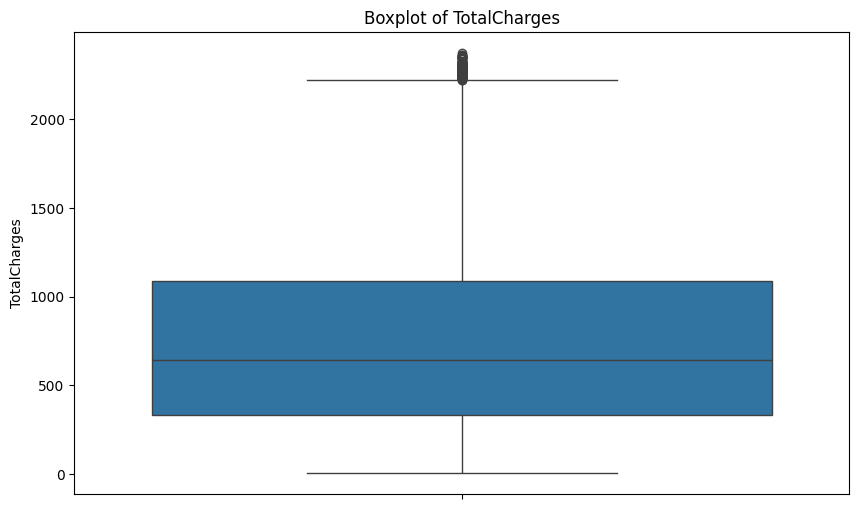

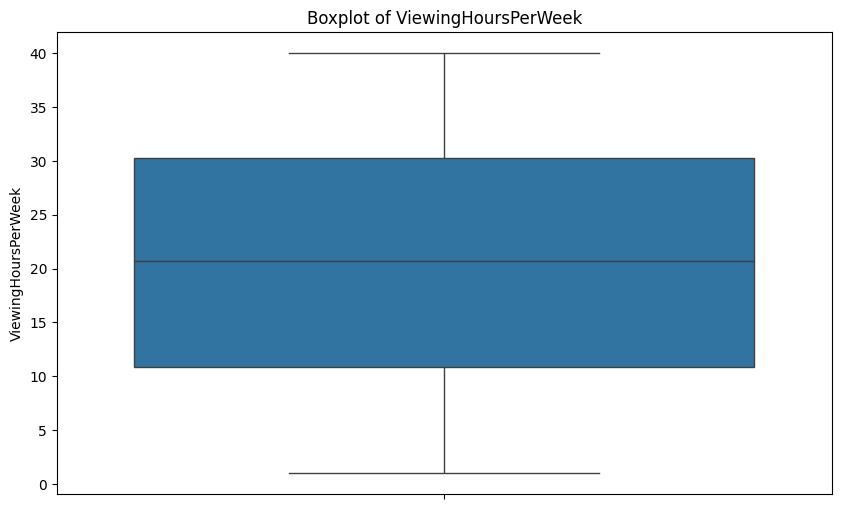

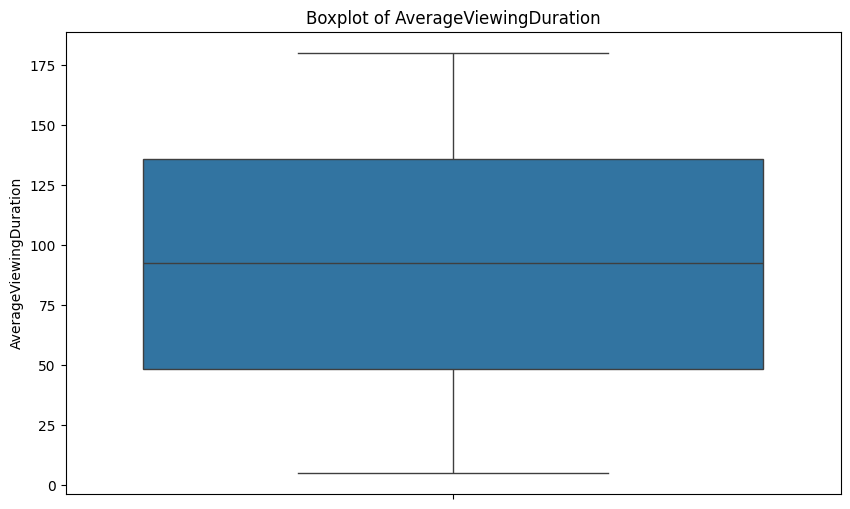

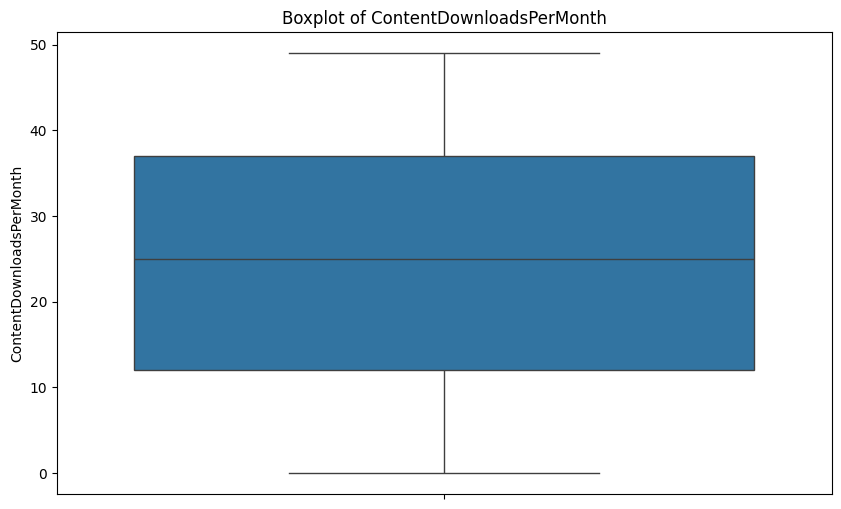

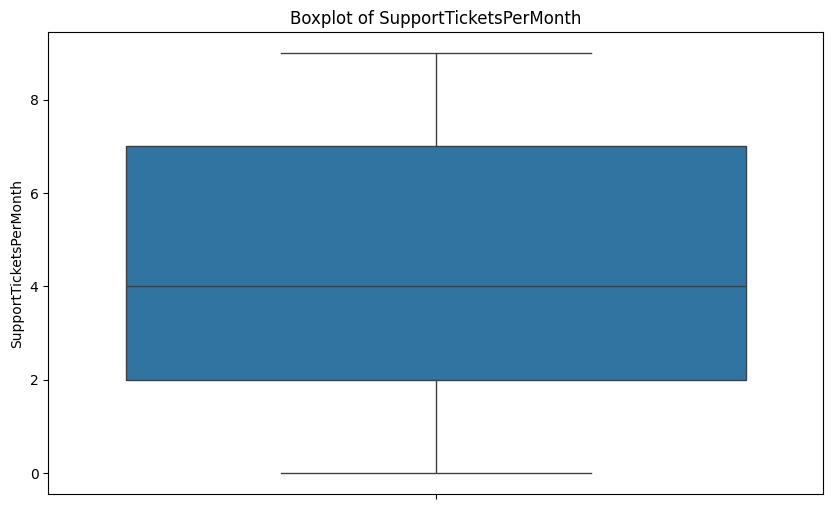

In [40]:
# produce boxplots for all numerical features and inspect for outliers

for value in data_preprocessed.select_dtypes(include=['int64', 'float64']).drop(columns='Churn', inplace=False).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data_preprocessed[value])
    plt.title(f'Boxplot of {value}')
    plt.show()

In [41]:
# Total charges appears to display several outliers

# Calculte and drop outliers outside a +--1.5 z-score
data_preprocessed['z_score'] = zscore(data_preprocessed['TotalCharges'])
data_preprocessed

/tmp/ipykernel_165/819549228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preprocessed['z_score'] = zscore(data_preprocessed['TotalCharges'])


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,SupportTicketsPerMonth,Gender,Churn,source,CohortSimplifed,z_score
0,20,11.055215,221.104302,Premium,Mailed check,Both,Mobile,36.758104,63.531377,10,Sci-Fi,4,Male,0,df0,1-2,-1.009589
1,57,5.175208,294.986882,Basic,Credit card,Movies,Tablet,32.450568,25.725595,18,Action,8,Male,0,df0,1-3,-0.868324
2,73,12.106657,883.785952,Basic,Mailed check,Movies,Computer,7.395160,57.364061,23,Fantasy,6,Male,0,df0,1-3,0.257472
3,32,7.263743,232.439774,Basic,Electronic check,TV Shows,Tablet,27.960389,131.537507,30,Drama,2,Male,0,df0,1-2,-0.987915
4,57,16.953078,966.325422,Premium,Electronic check,TV Shows,TV,20.083397,45.356653,20,Comedy,4,Female,0,df0,0-3,0.415289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,113,8.852247,1000.303949,Basic,Credit card,TV Shows,Mobile,36.286152,17.915012,34,Fantasy,5,Male,0,df9,1-3,0.480256
34582,42,10.983620,461.312027,Standard,Mailed check,Movies,Mobile,17.487259,102.412522,9,Drama,6,Male,1,df9,1-3,-0.550307
34583,43,11.959520,514.259343,Premium,Credit card,TV Shows,Mobile,26.355127,48.160768,17,Action,5,Male,0,df9,1-3,-0.449071
34584,110,5.222484,574.473204,Basic,Bank transfer,Both,Tablet,20.805085,54.255558,8,Fantasy,1,Male,0,df9,1-4,-0.333941


In [42]:
# Remove outliers outside a z-score of +/- 1.5 
data_preprocessed = data_preprocessed[data_preprocessed['z_score'].abs() < 1.5]

In [43]:
# Drop z_score column
data_preprocessed.drop('z_score', axis=1, inplace=True)
data_preprocessed

/tmp/ipykernel_165/182581969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preprocessed.drop('z_score', axis=1, inplace=True)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,SupportTicketsPerMonth,Gender,Churn,source,CohortSimplifed
0,20,11.055215,221.104302,Premium,Mailed check,Both,Mobile,36.758104,63.531377,10,Sci-Fi,4,Male,0,df0,1-2
1,57,5.175208,294.986882,Basic,Credit card,Movies,Tablet,32.450568,25.725595,18,Action,8,Male,0,df0,1-3
2,73,12.106657,883.785952,Basic,Mailed check,Movies,Computer,7.395160,57.364061,23,Fantasy,6,Male,0,df0,1-3
3,32,7.263743,232.439774,Basic,Electronic check,TV Shows,Tablet,27.960389,131.537507,30,Drama,2,Male,0,df0,1-2
4,57,16.953078,966.325422,Premium,Electronic check,TV Shows,TV,20.083397,45.356653,20,Comedy,4,Female,0,df0,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,113,8.852247,1000.303949,Basic,Credit card,TV Shows,Mobile,36.286152,17.915012,34,Fantasy,5,Male,0,df9,1-3
34582,42,10.983620,461.312027,Standard,Mailed check,Movies,Mobile,17.487259,102.412522,9,Drama,6,Male,1,df9,1-3
34583,43,11.959520,514.259343,Premium,Credit card,TV Shows,Mobile,26.355127,48.160768,17,Action,5,Male,0,df9,1-3
34584,110,5.222484,574.473204,Basic,Bank transfer,Both,Tablet,20.805085,54.255558,8,Fantasy,1,Male,0,df9,1-4


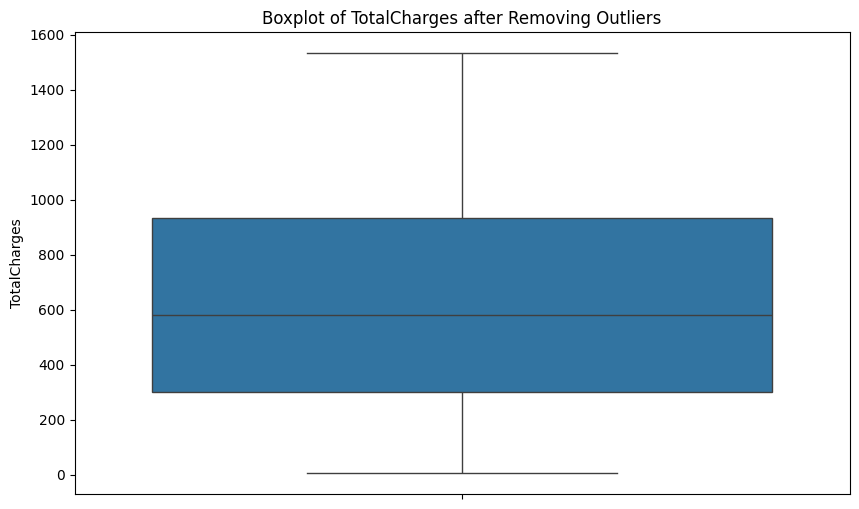

In [44]:
# Check new box plot for TotalCharges with ouliers removed 

plt.figure(figsize=(10, 6))
sns.boxplot(y=data_preprocessed['TotalCharges'])
plt.title(f'Boxplot of TotalCharges after Removing Outliers')
plt.show()

> Results: Successfully removed outliers from the dataset. 

<hr>

## F. Feature Engineering

In [45]:
feature_engineering_executive_summary = 'In order to prepare the data for analysis, section F involves the creation of new features from existing ones. This includes the rescaling and standardisation of existing features. This section also involves, the one-hot encoding of categorical variables in order for use in analysis. '

<hr>

### F.1 Log transformation

> Rationale: the following blocks apply a log transformation to the numerical data to see if correlations with the target variable improve

In [46]:
# get correlation table for numerical features 

numerical_features = list(data_preprocessed.select_dtypes(include=['int64', 'float64']).columns)
correlation_table = data_preprocessed[numerical_features].corr()

correlation_table

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,Churn
AccountAge,1.000000,-0.189470,0.803058,-0.003297,-0.002342,0.001157,-0.010804,-0.197568
MonthlyCharges,-0.189470,1.000000,0.349070,0.002657,-0.001941,-0.001262,0.001265,0.129761
TotalCharges,0.803058,0.349070,1.000000,-0.002520,0.000254,0.000487,-0.010483,-0.118664
ViewingHoursPerWeek,-0.003297,0.002657,-0.002520,1.000000,-0.001405,0.002023,0.003869,-0.136182
AverageViewingDuration,-0.002342,-0.001941,0.000254,-0.001405,1.000000,0.000736,0.003380,-0.148803
ContentDownloadsPerMonth,0.001157,-0.001262,0.000487,0.002023,0.000736,1.000000,0.001092,-0.131674
SupportTicketsPerMonth,-0.010804,0.001265,-0.010483,0.003869,0.003380,0.001092,1.000000,0.083817
Churn,-0.197568,0.129761,-0.118664,-0.136182,-0.148803,-0.131674,0.083817,1.000000


In [47]:
# copy numerical feature list dropping the target variable
numerical_features2 = data_preprocessed.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# create new df with only numerical features and apply log transformation 
scaled_data = data_preprocessed[numerical_features]
scaled_data[numerical_features2] = scaled_data[numerical_features2].apply(lambda x: np.log(x + 1))

# create and print correlation table
correlation_table2 = scaled_data.corr()

correlation_table2


/tmp/ipykernel_165/2960769332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data[numerical_features2] = scaled_data[numerical_features2].apply(lambda x: np.log(x + 1))


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,Churn
AccountAge,1.000000,-0.120870,0.919739,-0.003684,-0.002864,-0.002452,-0.010990,-0.185551
MonthlyCharges,-0.120870,1.000000,0.275552,0.002713,-0.001765,0.004609,0.003216,0.125160
TotalCharges,0.919739,0.275552,1.000000,-0.002796,-0.003388,-0.000667,-0.009420,-0.128097
ViewingHoursPerWeek,-0.003684,0.002713,-0.002796,1.000000,-0.001215,0.002693,0.002707,-0.132341
AverageViewingDuration,-0.002864,-0.001765,-0.003388,-0.001215,1.000000,0.006450,0.010922,-0.143418
ContentDownloadsPerMonth,-0.002452,0.004609,-0.000667,0.002693,0.006450,1.000000,0.004332,-0.124503
SupportTicketsPerMonth,-0.010990,0.003216,-0.009420,0.002707,0.010922,0.004332,1.000000,0.077795
Churn,-0.185551,0.125160,-0.128097,-0.132341,-0.143418,-0.124503,0.077795,1.000000


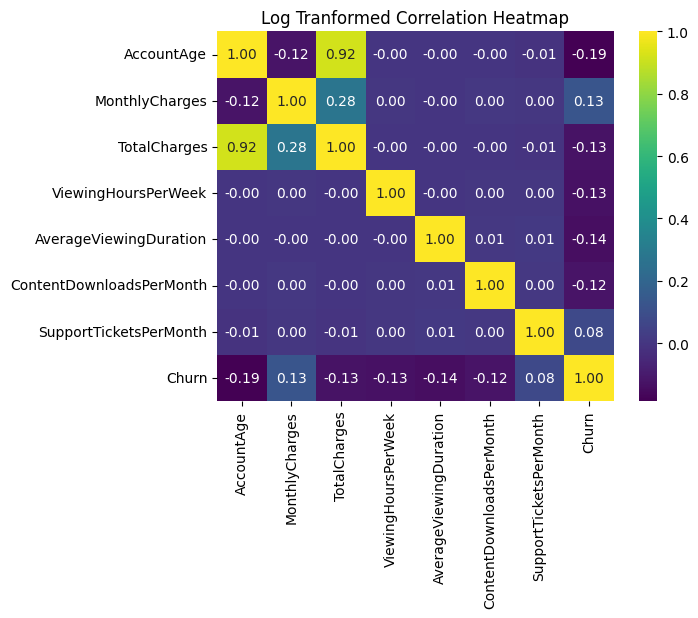

In [48]:
# make heat map of new scaled variables

sns.heatmap(correlation_table2, annot=True, fmt='.2f', cmap='viridis')
plt.title('Log Tranformed Correlation Heatmap')
plt.show()

> Results: No log transformed variables were included as they did not meaningfully increase the correlation with the target variable. 

<hr>

### F.2 New Feature "SimplifiedCohort"

> Rationale: partial null values and high cardinality in the cohort variable were deemed to make it inn approprite. As a result, a simplified variable was used in place. this was performed in section D.2 the following code blocks depict the reduction in cardinality from 29,907 levels to 10.

In [49]:
# count plot for original cohort variable 

data_nonpersonal['Cohort'].nunique()

29907

Text(0.5, 1.0, 'Count Plot of Simplified Cohort')

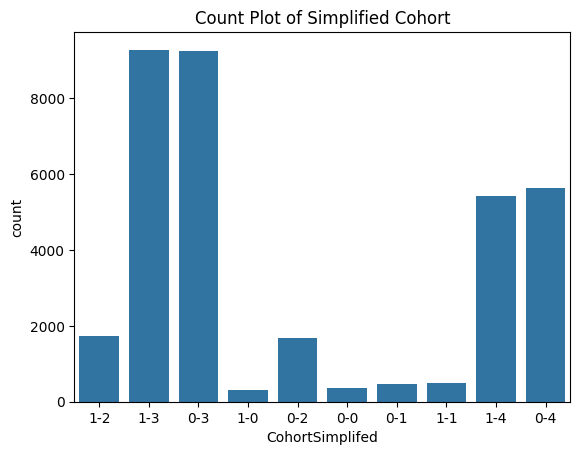

In [50]:
# count plot for new simplified cohort variable

sns.countplot(x='CohortSimplifed', data=data_nonpersonal)
plt.title('Count Plot of Simplified Cohort')


> Results: The new variable greater improves cardinality and is more appropriate for quantitative analysis 

<hr>

### F.3 One hot encoding categorical variables 

> Rationale: One hot encoding of variables allows for the inclusion of categorical variables for quantitative analysis. Although some methods of analysis require drop_first to be true to prevent multicollinearity, some ensemble methods of analysis are best performed with all dummy variables. One hot encoding will be performed in the feature engineering sections of the following experiments, post splitting in order to prevent data leak.

<hr>

<hr>

## G. Data Preparation for Modeling


In [51]:
modeling_preparation_executive_summary = 'For Section G, the dataset will be split into three separate datasets in a train, test, validation method. This allows for 1. a model to be trained using the training dataset, 2. the hyperparameters to be tuned using the validation dataset and 3. a final testing dataset for obtaining performance characteristics, mimicking unseen data. This approach should limit the possibility of overfitting the model, during both the training phase and the validation phase. A split of 60:20:20 was used for training, testing and validation respectively. One-hot encoding was performed prior to model splitting however this is not always possible in real situations.  '

<hr>

### G.1 Split Datasets

> Rationale: Splitting results into training, validation and testing datasets in order to prevent overfitting when training and tuning hyperparameters.

In [52]:
# Make first split to get training and temp split
train_data, temp_data = sklearn.model_selection.train_test_split(data_preprocessed, test_size=0.4, random_state=101)

# make second split to get validation and test sets
test_data, validation_data = sklearn.model_selection.train_test_split(temp_data, test_size=0.5, random_state=101)

X_train = train_data.copy()
X_val = validation_data.copy()
X_test = test_data.copy()

y_train = X_train.pop(target_name)
y_val = X_val.pop(target_name)
y_test = X_test.pop(target_name)

> Results: data sets split successfully

<hr>

### G.2 Data Transformation Scaling Data

> Rationale: Whilst some methods of analysis planned are not distance based and do not require scaling. numerical data is still scaled for convenience as it will not impact results. 

In [53]:
# use numerical columns from before to prevent scaling of categorical columns

# Initialize the StandardScaler
scaler = StandardScaler()


# Fit and transform the numerical columns
X_train[numerical_features2] = scaler.fit_transform(X_train[numerical_features2])

#check results
X_train

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,SupportTicketsPerMonth,Gender,source,CohortSimplifed
29465,1.588845,0.016420,1.614839,Premium,Electronic check,Both,TV,-1.090333,0.445098,-0.535212,Sci-Fi,-0.869823,Female,df8,0-3
17782,-1.110144,1.500649,-0.711572,Premium,Credit card,Both,Mobile,0.211828,-1.180326,0.779096,Fantasy,-0.171142,Female,df4,0-3
16570,1.220801,-1.169333,0.097870,Premium,Credit card,Movies,TV,0.759197,-0.018520,0.571574,Comedy,-0.520483,Female,df3,0-3
21770,1.036779,0.843668,1.837829,Standard,Electronic check,Both,Mobile,-0.215220,0.389272,-1.641998,Drama,0.876880,Male,df5,1-3
26318,-0.619419,1.380670,-0.034457,Standard,Bank transfer,Both,Mobile,0.848636,1.670202,1.055793,Drama,-1.219164,Female,df7,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,-0.312715,-0.078773,-0.272961,Premium,Mailed check,TV Shows,Computer,-1.652907,-1.441659,-0.120167,Drama,-0.171142,Male,df0,1-4
8881,-0.711430,0.963047,-0.303451,Premium,Electronic check,TV Shows,Mobile,-1.728577,-0.821844,1.332489,Action,0.527540,Female,df0,0-4
19672,1.282142,-1.008796,0.293294,Premium,Mailed check,Both,Mobile,1.718039,0.387394,-0.258516,Action,0.527540,Female,df4,0-3
19877,-1.478188,1.440237,-1.256199,Premium,Bank transfer,Movies,TV,-0.872902,-0.256443,-0.327690,Comedy,1.575562,Male,df4,1-3


In [54]:
# use same scaler to transform validation and test sets
X_val[numerical_features2] = scaler.transform(X_val[numerical_features2])
X_test[numerical_features2] = scaler.transform(X_test[numerical_features2])

> Results: Numerical values sclaed successfully.

<hr>

### G.3 Data Transformation Log Transformation

> Rationale: Log transformed variables did not provide any gain when tested in the exploratory section and as a result were not included for analysis.

<hr>

<hr>

## H. Save Datasets

In [55]:
# Save training set
# Do not change this code

X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [56]:
# Save validation set
# Do not change this code

X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

In [57]:
# Save testing set
# Do not change this code

X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## I. Assess Baseline Model

In [58]:
baseline_model_executive_summary = 'The goal of this section is to provide a baseline model to compare results from future models to to assess performance. '

<hr>

### I.1 Simulate Predictions with Baseline Model

> Rationale: find the mode of the target variable

In [59]:
# Define central value for baseline model

y_central = y_train.mode()
y_central

0    0
Name: Churn, dtype: int64

In [60]:
# fill array with prediction from initial model

training_preds = np.full(y_test.shape, y_central)

<hr>

### I.2 Selection of Performance Metrics

> Rationale: As discussed in section C.3 accuracy is likely an inappropriate metric to use due to class imbalance in the target variable. Recall seems like the most appropriate measure as there is likely little consequence for producing a false positive. Precision is likely to be biased minimising false positives and as a results is not as important given the use case. As a result, f1 as a more balanced metric and recall were determined to be the best performance metrics given the use case. ROC-AUC is also reported for as an intuitive comparative metric for comparing between models and for tuning hyperparameters.  

In [61]:
# import performance metrics

from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix, classification_report


<hr>

### I.2 Baseline Model Performance

In [62]:
y_test.value_counts(normalize=True)

Churn
0    0.811768
1    0.188232
Name: proportion, dtype: float64

In [63]:
# evaluate model performance 

print(roc_auc_score(y_test, training_preds))

print(f1_score(y_test, training_preds, average='weighted'))
print(confusion_matrix(y_test, training_preds))
print(classification_report(y_test, training_preds))

0.5
0.7274307621800247
[[5063    0]
 [1174    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      5063
           1       0.00      0.00      0.00      1174

    accuracy                           0.81      6237
   macro avg       0.41      0.50      0.45      6237
weighted avg       0.66      0.81      0.73      6237

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

> Results: As the mode is 0 and due to the class imbalance in the target variable, the baseline model demonstrates poor predictive power (ROC-AOC=0.5, no better than random guessing) as expected. Accuracy would suggest that the the model is successful however this is misleading due to class imbalance). Weighted f1 score was used due to class imbalance. 

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c3586fc-cd83-4e7b-a04a-11476af0d44a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>